# Minimizing Multivariate Functions

We now move into minimizing objectives that are multivariate functions.  They still return a single quantity that we wish to optimize, so they are scalar functions, but we will now move into the case of optimizing that objective function by iteratively varying ***more than one*** function argument. We encounter this type of problem all the time!

Let's start with a very basic example: we have a function that describes the value of z for values of x and y:

$$z(x,y) = (x - 10)^2 + (y + 5)^2$$

By inspection, we know that this function has a minimum value of z = 0 at x = 10, y = -5, but if we can, it's a good idea to start with a visualization of the problem.  This is a 3D problem, so we are still able to visualize it reasonably well. Once we hit 4D, all bets are off!  

You can look up 3D plotting in matplotlib; I found the link below to be helpful. 

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Visualizing a multivariate function with a surface plot

The following code will create a surface plot for visualization:

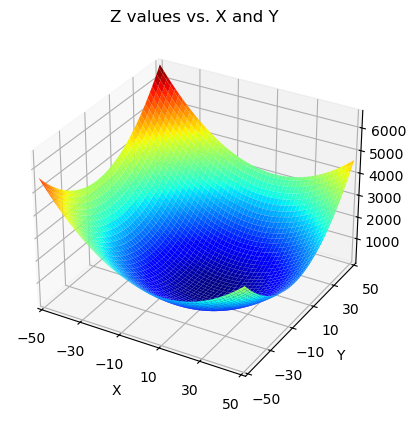

In [2]:
# This plot graphs the above function z in a 3d surface plot

z    = lambda x,y: (x-10)**2 + (y+5)**2
x    = np.linspace(-50, 50, 100)
y    = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(x, y) #we're making a surface plot, so we create a grid of (x,y) pairs
Z    = z(X,Y)  #generate the Z data on the meshgrid (X,Y) by evaluating f at each XY pair.

#Create the figure and axis
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap = 'jet')
#Set properties
plt.xlim(-50, 50)
plt.xticks(np.arange(-50, 50.1, 20))
plt.ylim(-50, 50)
plt.yticks(np.arange(-50, 50.1, 20))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Z values vs. X and Y')
plt.show()

## Analogous syntax for contour plots and filled contour plots

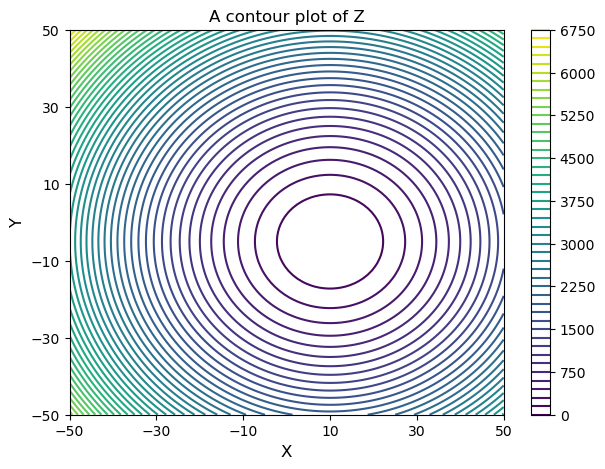

In [3]:
#Plot as contours
plt.figure(2, figsize = (7, 5))
plt.title('A contour plot of Z')
plt.contour(X, Y, Z, levels = 50)
plt.xlim(-50, 50)
plt.xticks(np.arange(-50, 50.1, 20))
plt.ylim(-50, 50)
plt.yticks(np.arange(-50, 50.1, 20))
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.colorbar()
plt.show()

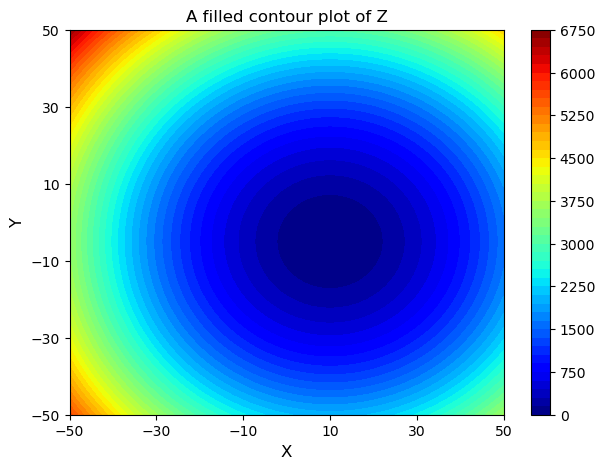

In [4]:
#Plot as filled contours
plt.figure(2, figsize = (7, 5))
plt.title('A filled contour plot of Z')
plt.contourf(X, Y, Z, levels = 50, cmap = 'jet')
plt.xlim(-50, 50)
plt.xticks(np.arange(-50, 50.1, 20))
plt.ylim(-50, 50)
plt.yticks(np.arange(-50, 50.1, 20))
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.colorbar()
plt.show()

## Passing array arguments to the function

This is a multivariate function, z(x,y), that returns a single output, z. We can minimize z by using any of the `opt.minimize()` routines or any of the global optimzation routines we tested on univariate functions. We just make a simple extention to our original syntax. I know that above, we've wrote this out as z(x,y), which is conceptually true, but there is a catch when working with `opt.minimize()`:

It will only vary the value of the first argument when seeking an optimum, and it will treat any additional arguments we pass to the function as fixed parameters. So, if I were to give z(x,y) to an optimizer, it would vary the value of x while holding y fixed at the initial value. Instead, I have to create function that accepts an ***array*** as its first argument. That first argument should be a collection - usually a list, a numpy array, or a tuple - of variables that I want to adjust until I find the minimum value of my function.  So, instead of working with:

```python
def z(x,y):
    return (x - 10)**2 + (y + 5)**2
```
        
or it's analogous lambda function

```python
z = lambda x,y: (x - 10)**2 + (y + 5)**2
```

We want to write this particular objective function such that its first argument is a collection of all of the variables we want to minimize with respect to:

```python
def z(var):
    return (var[0] - 10)**2 + (var[1] + 5)**2
```

or, it's analgous lambda function:

```python
z = lambda var: (var[0] - 10)**2 + (var[1] + 5)**2
```

### Improving human readability
    
Often, to improve readability in a complex function, I will use a long form function definition and redefine elements in "var" using the labels that are specific to the way we express our function on paper:

```python
def z(var):
    x = var[0]
    y = var[1]
    return (x - 10)**2 + (y + 5)**2
```

Note that Python will also allow you to unpack elements in an array as a set of comma separated values, which is a bit more concise (This is equivalent in practice to the above).

```python
def z(var):
    x, y = var
    return (x - 10)**2 + (y + 5)**2
```

Any of the above options will work. Now that we've created an objective function that takes a single array argument, we can pass this objective function as an argument to `opt.minimize()`.  The only other catch is that we need an initial guess for the (x,y) pair, and it should be a collection of the same size and type that we used for our function argument - in fact, our initial guess is what sets the data type for var.  So, my full optimization script would look something like this. Just so that we can make the optimizer work for it, let's start at an initial guess of [10, 50] for x and y, which we'll pass as `var0 = [10, 50]`. As we saw in past exercises, `opt.minimize()` will output a solution structure, and I can access individual attributes of that solution structure using a dot operator.

In [5]:
def z(var):
    x, y = var
    return (x - 10)**2 + (y + 5)**2
var0 = [10, 50]  #Initial guess for x and y as a list; I could also use an array or tuple.
opt.minimize(z, var0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.6362041652578235e-12
        x: [ 1.000e+01 -5.000e+00]
      nit: 2
      jac: [ 1.490e-08 -4.733e-06]
 hess_inv: [[ 1.000e+00  0.000e+00]
            [ 0.000e+00  5.000e-01]]
     nfev: 15
     njev: 5

### Adding bounds on variables

Now that we have the basic example, we can add bounds just as we did with the univariate functions from Module 10. For example, let's add bounds that allow us to find the minimum only between x = [1,10] and y = [20, 50]. Note that the lower and upper bounds are passed as a collection of (lower_bound, upper_bound) sets.  Their order should be the same as the variable arguments that are being passed to our objective function.

In [6]:
opt.minimize(z, var0, bounds = [(1, 10), (20, 50)]) #bounds = [(lower_x, upper_x), (lower_y, upper_y)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 625.0
        x: [ 1.000e+01  2.000e+01]
      nit: 1
      jac: [-0.000e+00  5.000e+01]
     nfev: 6
     njev: 2
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

### Adding constraints in Multivariate Optimization

We can also add equality or inequality constraints just as easily.  For example, let's add the constraints that:

$$x^2 + 2y \geqslant 10$$

$$x - 12y^3 = 50$$

For this example, to focus on constructing and adding constraints, we'll remove the bounds on x and y. Remember: we have to specify each constraint in a separate function, and we stack those constraints up in a tuple of dictionaries. In the cell below, those second and third terms in the print statement look goofy, but it is your two constraints written as Boolean comparisons; If your optimization satisfied your constraints (within the precision of floating point arithmetic), both should print "True." 

In [7]:
#first constraint function
def conf1(var):
    x = var[0]
    y = var[1]
    return x**2 + 2*y - 10

#second constraint function
def conf2(var):
    x = var[0]
    y = var[1]
    return x - 12*y**3 - 50

#construct constraints in dictionary
con1 = {'type' : 'ineq' , 'fun' : conf1}
con2 = {'type' : 'eq'   , 'fun' : conf2}

#optimization
sol = opt.minimize(z, var0, constraints = (con1, con2)) #Uses SLSQP by default
x, y  = sol.x
print(sol, '\n')
print(sol.fun, x**2 + 2*y >= 10, round(x - 12*y**3, 0) == 50)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 12.291524027857486
       x: [ 9.956e+00 -1.494e+00]
     nit: 16
     jac: [-8.745e-02  7.011e+00]
    nfev: 50
    njev: 16 

12.291524027857486 True True


### Passing extra arguments or parameters

Finally, you often will encounter an optimization problem wherein you need to minimize an objective function by varying a set of parameters, but you also need to pass additional information to the function.  As an example, let's use the following function:

$$q(x,y,a,b) = ax^2 + by^2 + x - y$$

In this particular, example, a and b are coefficients, while x and y are the true "independent variables" that we are looking to optimize this function with respect to; however, our solution also will generally depend on the values of a and b, and we may need to consider the solution for multiple values of a and b.  To handle this type of function, we would construct the objective function in the cell below.
        
In this form, we include the variables that we want to minimize with respect to (x,y) in the vector argument `var`; they still need to be passed to the objective function as elements in a single collection. In contrast, we pass a and b as additional function arguments that will not be varied by the optimization routine. `opt.minimize` will only change the values of elements in `var`. In a lot of languages, you'd probably use anonymous functions to handle this; that will work in Python as well.  That said, Python also gives you the convenient option of passing extra arguments using the args keyword.  ***This works for most numerical methods from Scipy***.

In [8]:
def q(var, a, b):
    x = var[0]
    y = var[1]
    return a*x**2 + b*y**2 + x - y

### Solving the problem with extra arguments

Here, we'll solve the problem for a = 1 and b = 3. It might not yet be apparent why you'd want to do this, but keep working on optimization problems for awhile, and I'm sure you'll find some examples. I rarely optimize a function that *doesn't* use this convention these days. In fact, the next regression example uses this approach as a demonstration of best practice for working with local variables inside of a function scope.

In [9]:
opt.minimize(q, var0, args = (1, 3))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.33333333333174187
        x: [-5.000e-01  1.667e-01]
      nit: 9
      jac: [-1.900e-06  2.891e-06]
 hess_inv: [[ 5.042e-01 -2.119e-03]
            [-2.119e-03  1.677e-01]]
     nfev: 33
     njev: 11

You can build almost infinitely from this basic framework of optimizing multivariate functions.  You can easily extend to optimize with respect to 3, 4, 5, or 15 parameters; however, just be aware that the more parameters you have, the more difficult it is to perform a meaningful optimization. 

Next, we'll cover a very, very common example of optimization that most of us have used before, even if we aren't necessarily aware of how it works: least squares regression. 

## Least Squares

The basic problem should be familiar to everyone. You have a set of data, and you want to create a model that describes data well enough that it is reasonably predictive. 

### Enzyme Kinetics

Here's a concrete example that is relevant to anyone working with biological processes: the kinetics of an enzyme catalyzed reaction. We know that the rate of an enzyme-catalyzed reaction will generally depend on the concentration of the reactant, let's call it the substrate. We perform an experiment by varying the concentration of our substrate ($C_S$) and measuring the resultant reaction rate. I've loaded some typical laboratory data into the cell below for visualization; go ahead and plot them using a scatter plot to visualize the relationship between rate and substrate concentration in this system.

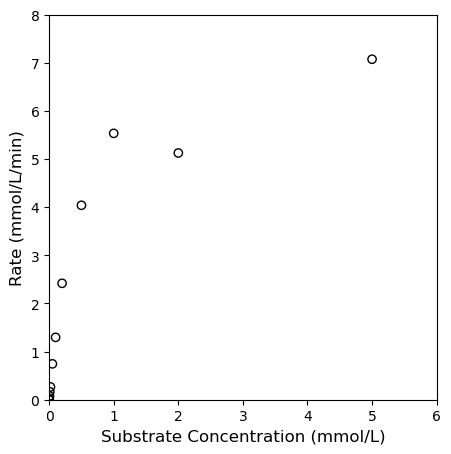

In [10]:
CS = np.array([0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]) #mmol/L
rate = np.array([0, 0.017537467, 0.030941975, 0.080327165, 0.1643835, 0.26569368, 0.745442547, 1.295792328, 2.419014706, 4.0402125, 5.534947297, 5.127217742, 7.074911496]) #mmol/L/min

## Graphing the data
plt.figure(1, figsize = (5, 5))
plt.scatter(CS, rate, marker = 'o', color = 'none', edgecolor = 'black')
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.xlabel('Substrate Concentration (mmol/L)', fontsize = 12)
plt.ylabel('Rate (mmol/L/min)', fontsize = 12)
plt.show()

### Proposing a nonlinear model

Looking at the data, I notice two things.  First, the data are not perfect.  This is typical of experimental data!  Second, I can see that, initially, increasing the substrate concentration increases the rate of reaction, but this only occurs up to a certain point. This is referred to as "saturation kinetics" wherein the rate eventually becomes insensitive to additional increases in substrate concentration. This data set looks typical of a Michaelis-Menten mechanism for an enzyme-catalyzed reaction, where the rate is usually described by:

$$\mathrm{rate} = \frac{V_{max}C_S}{K_m + C_S}$$

Inspecting the equation, it's easy to see why the reaction rate becomes zero order in $C_S$ at high concentrations.  In this limit, $C_S$ is the dominant term in the denominator, and the rate approaches $V_{max}$, which should give you a hint as to why this parameter is called "$V_{max}$".

It would be useful to my group if we could figure out the values for $V_{max}$ and $K_m$ -- once we know their values, we can predict the rate of that reaction for *any* substrate concentration, which will allow us to scale this reaction and implement it in any system that we need to.  But how do we do that? Looking at the graph, we can see that we have 13 different rate vs. $C_S$ pairs, all of which are noisy and subject to measurement uncertainty.  We didn't do anything wrong *per se*, this is just typical of a laboratory experiment, where there are many sources of error. Our first instinct might be to pick two rate vs. $C_S$ pairs and plug them into the Michaelis-Menten rate equation (70% of my students do this on their exams). That would give us two equations and two unknowns ($V_{max}$ and $K_m$), which we could easily solve using a root finding algorithm. Unfortunately, since none of our measurments are *exactly correct*, we will get different answers for every ($C_S$, rate) pair that we pick. Our system is over-determined, and it is incorrect (and honestly a bit lazy) to try to solve it as a system of equations. Instead, we have to solve it by *minimizing* the error between our measurements and our experiments. Usually, we do this by minimizing some form of the residual sum of squares, which quantifies the level of agreement between measurement values and model predictions. The most basic version is defined based only on the difference between the model and measurement:

$$\textrm{SSE} = \sum_{i = 1}^n\left(\textrm{measurement}_i - \textrm{model}_i\right)^2$$

But this is really just another example of minimizing an objective function! Which we already know how to do! In this case our objective function is the residual sum of squares. Minimizing that objective function by varying model parameters minimizes the residual sum of squares, which is the process of least squares regression. We use this method all the time! Every time you use a trendline in Excel, for example, you are performing a least squares regression (whether you knew it or not).  

Now, let's look at how to formulate this problem in Python and solve it using the optimization tools in Scipy.

### Minimizing Least Squares for Michaelis-Menten Kinetics

The "saturation kinetics" that we observe in this system suggests a Michaelis-Menten mechanisms, which we model as:

$$rate = \frac{V_{max}C_S}{K_m + C_S}$$

Next, we need to build an objective function that calculates the residual sum of squares between the model prediction and the experimental measurment for our experimental set of substrate concentrations. In this case, our objective function will be a ***multivariate scalar function***. It will accept two parameters that we want to find optimum values for -- $K_m$ and $V_{max}$ -- and it will return a single value that we wish to minimize, the residual sum of squares. 

As in in the first example of this worksheet, when I construct this objective function, I will need to pass all of the parameters I'm looking to vary in a single array-like structure, so I have to pack $K_m$ and $V_{max}$ into a  collection for this to work. Though it isn't necessary to do so, I often rename them once inside the function scope to make it more readable.  Since I want that function to compute the error between model and measurement, I also need to access my experimental data inside of the function. Best practice is to work with local variables inside of a function (i.e., variables that are only defined inside of the function scope), so I add two extra arguments to my objective function, one representing substrate concentration, and one representing the reaction rate. 

In [11]:
def obj(par, C, r):
    Vmax  = par[0]
    Km    = par[1]
    model = (Vmax*C)/(Km + C)
    SSE = sum((r - model)**2)
    return SSE

Now that I have an objective function, I can use opt.minimize to minimize it.  We have to provide initial guesses for our parameters as some sort of collection.  Since we're working with numpy arrays everywhere else, I'll pass my initial guesses into the minimizer using a numpy array as well. I'll also use the args keyworkd to send my experimental data into the objective function.

In [12]:
par0 = np.array([1,1])
sol = opt.minimize(obj, par0, args = (CS, rate))
print(sol)
Vmax_opt, KM_opt = sol.x

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.109424939810443
        x: [ 7.207e+00  4.093e-01]
      nit: 13
      jac: [-5.066e-07  2.176e-06]
 hess_inv: [[ 5.359e-01  8.323e-02]
            [ 8.323e-02  2.006e-02]]
     nfev: 90
     njev: 30


Finally, we can overlay our "best fit" model with the experimental data, and you'll generally observe that this particular parameter set does a good job of minimizing the error between our model predictions and the measurements that we have available.

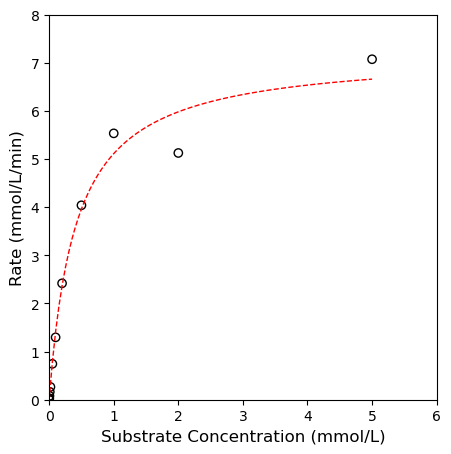

In [13]:
## Graphing the data, overlay the line of best fit
Cplot = np.linspace(0, 5, 100)
plt.figure(1, figsize = (5, 5))
plt.scatter(CS, rate, marker = 'o', color = 'none', edgecolor = 'black')
plt.plot(Cplot, Vmax_opt*Cplot/(KM_opt + Cplot), color = 'red', linewidth = 1, linestyle = 'dashed')
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.xlabel('Substrate Concentration (mmol/L)', fontsize = 12)
plt.ylabel('Rate (mmol/L/min)', fontsize = 12)
plt.show()

```{note}
Technical Aside that is important but probably not super interesting to you: strictly speaking,  once I've loaded them into the Python workspace, `CS` and `rate` are global variables, so both `CS` and `rate` are defined and accessible ***inside*** of the function scope. That said, *best practice* is to work only with local variables inside of the function and to pass experimental data as additional arguments. Since that is usually best practice, that's what I did here. 

This is different from Matlab's default behavior, which is to restrict function scope to local variables by default. In Matlab, I would need to either declare CS and rate as global variables (generally not recommended), nest the two functions somehow (generally not recommended), or pass CS and rate as arguments to the objective function by way of an anonymous function (recommended).  
There are a lot of reasons why global variable declarations can be problematic.  Sometimes, for convenience, we leverage them, particularly in a language like Python and when working in a Jupyter notebook. But best practice is *usually* to work with local variables defined only within the scope of the particular function or subroutine you're working on.  Just be careful.  I find it easy to be lazy about globals, particularly in Jupyter.
```

### Adding bounds to the least squares regression

It is straightforward to bound both of my parameters with opt.minimize. Where bounds are input as a list of tuples.  The first tuple is (lower_bound, upper_bound) on argument 1 ($V_{max}$), the second is the (lower_bound, upper_bound) on argument 2 ($K_m$), etc.

In [14]:
opt.minimize(obj, [7,0.3], args = (CS, rate), bounds = [(6.8, 7.4), (0.1, 0.5)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.1094249398113
        x: [ 7.207e+00  4.093e-01]
      nit: 10
      jac: [ 1.665e-06  2.309e-06]
     nfev: 36
     njev: 12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

## Specialized Least Squares minimizers in Scipy

The above is a homebrew least squares error minimization using `opt.minimize()`. This is generally what people are doing when they talk about "nonlinear regression." There is nothing wrong with using `opt.minimize()` in this way; however, if you scan the documentation for `scipy.optimize`, you'll find two specific routines cited for nonlinear regression; both are good and worth exploring.  The first is:

```python
opt.least_squares()
```
    
The second is:

```python
opt.curve_fit()
```
    
`opt.least_squares()` is a very nice method that is optimized for nonlinear least squares; however, it requires you to provide a vector function from which it generates the scalar objective function for least squares on its own.  We'll save consideration of `opt.least_squares()` until after Module 12, where we will introduce vector functions and Python subroutines that are based on vector functions.

The second one, `opt.curve_fit()`, is really great for simple model fitting (exactly like what we are doing with the Michaelis-Menten rate law here). This one has a pretty unique syntax relative to what we find elsewhere in `scipy.optimize`, so we'll go ahead and cover it here since it doesn't require us to work with vector functions. 

Instead of writing a function to return your objective, you provide `opt.curvefit()` with a function that returns your model prediction only. `opt.curvefit()` then uses that model equation to generate the least squares objective function automatically. So that it can do this, you'll also provide `opt.curvefit()` with your raw "xdata" and "ydata", in our case, these are substrate concentration and rate respectively.  The basic syntax is straightforward, it's just different from what you'd use with `opt.minimize()`:

```python
opt.curve_fit(function_name, xdata, ydata)
```
You can also add a number of options as usual. For our specific problem, `xdata = CS`, `ydata = rate`, and `function` will be a function that returns the Michaelis-Menten rate at a specific value of CS, $V_{max}$, and $K_m$). 

```{info}
When you use `opt.curvefit()`, the function that you create must accept your independent variable, in this case CS, as its first argument. Any parameters you are looking to fit are passed as subsequent arguments. This is completely opposite of `opt.minimize syntax`; you'll just have to get used to it if you want to use `opt.curvefit()`. Neither is really better than the other, it just depends which you find most intuitive and best suited to your problem.
```

I've also added some bounds to this one to illustrate that the general syntax looks very similar to `opt.minimize()` in that it accepts a list of tuples; however, in this case, the first tuple is a set of lower bounds for all variables, and the second tuple is a set of upper bounds for all variables. That is different from the `opt.minimize()` syntax, so be careful!

I always debate whether to introduce different routines like `opt.curve_fit()` when the syntax for `opt.minimize()` feels more universal and in line with algebraic equation solvers.  I can think of two good reasons to do it:

1. It is optimized for least squares problems, whereas `opt.minimize()` is a general routine
2. It returns the covariance matrix, which makes it easy to calculate confidence intervals

In [15]:
def f(C, Vmax, Km):
    return (Vmax*C)/(Km + C)
sol = opt.curve_fit(f, CS, rate, bounds = [(6.8, 0.1), (7.4, 0.5)] )
print(sol)

(array([7.20658895, 0.40925666]), array([[0.10782994, 0.01660871],
       [0.01660871, 0.00407721]]))


Optimization is a very complex topic, and we have only presented a basic overview of *some* of the tools available here.  Still, it should give you a feel for the methods available to you, give you some appreciation for how they work, and provide you enough background to select appropriate algorithms and initial guesses, as well as bound your system in various ways.